In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
data = pd.read_excel('J1newdata.xlsx')

In [103]:
print(data.head())
print(data.dtypes)


       MONTH  AVERAGE
0  2023-23-1   112.18
1  2023-23-2   112.68
2  2023-23-3   112.68
3  2023-23-4   112.54
4  2023-23-5   112.51
MONTH       object
AVERAGE    float64
dtype: object


In [104]:
data.set_index('MONTH',inplace = True)


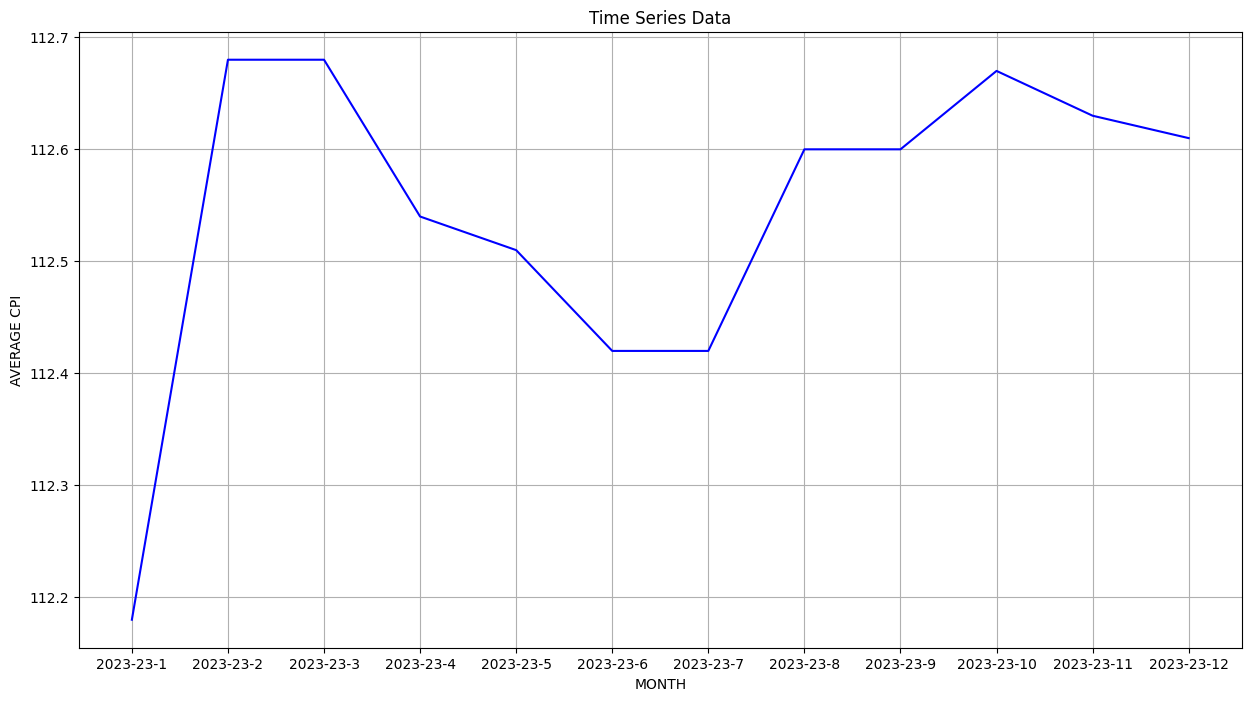

In [105]:
plt.figure(figsize=(15, 8))
plt.plot(data.index, data['AVERAGE'], color='blue')
plt.title('Time Series Data')
plt.xlabel('MONTH')
plt.ylabel('AVERAGE CPI')
plt.grid(True)
plt.show()

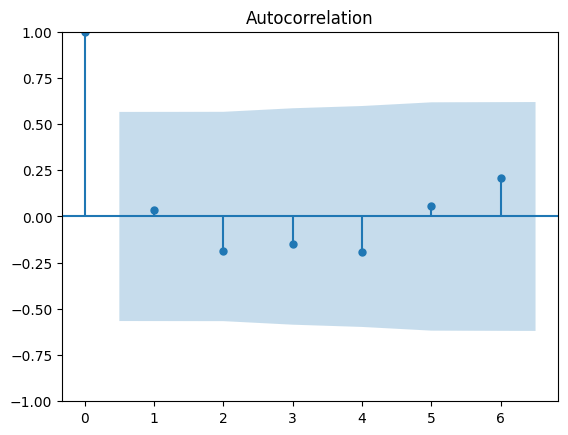

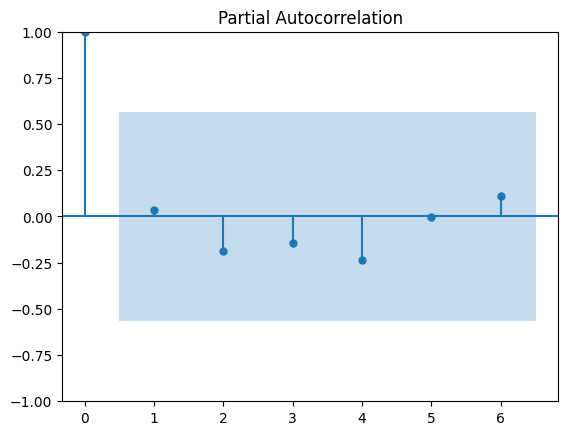

In [106]:
#CHECKING FOR STATIONARITY USING PACF AND ACF PLOTS
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['AVERAGE'], lags= 6)
plot_pacf(data['AVERAGE'], lags=6)
plt.show()

In [107]:
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['AVERAGE'], order=(6, 0, 30))  # Replace p, d, q with appropriate values
results = model.fit()


c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\si

In [108]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                AVERAGE   No. Observations:                   12
Model:                ARIMA(6, 0, 30)   Log Likelihood                  10.212
Date:                Mon, 15 Apr 2024   AIC                             55.577
Time:                        12:54:58   BIC                             74.003
Sample:                             0   HQIC                            48.754
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.5349      0.245    458.743      0.000     112.054     113.016
ar.L1         -0.3128     15.524     -0.020      0.984     -30.739      30.114
ar.L2         -0.9280      3.669     -0.253      0.8

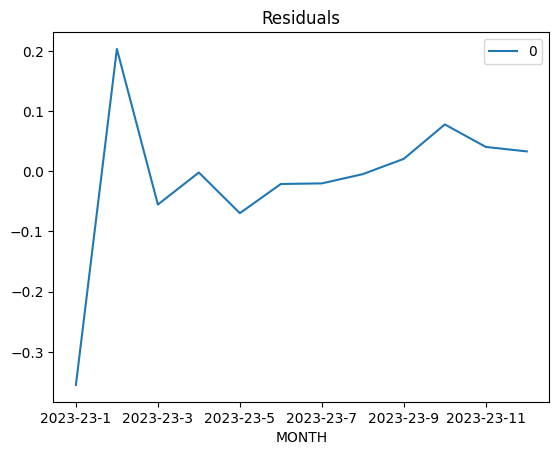

In [109]:
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.title('Residuals')
plt.show()


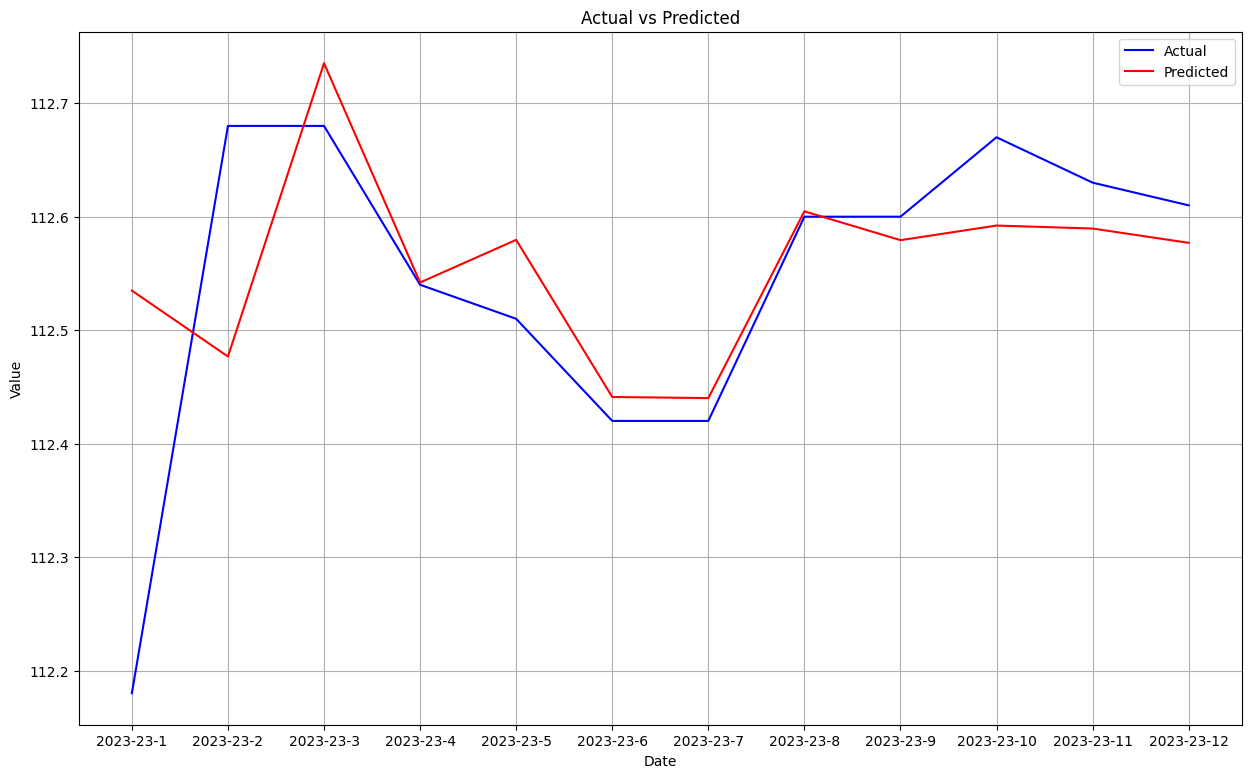

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 9))
plt.plot(data.index, data['AVERAGE'], color='blue', label='Actual')
plt.plot(data.index, results.fittedvalues, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [111]:
# Forecast future values
forecast_steps = 6  # Specify the number of steps to forecast
forecast = results.forecast(steps=forecast_steps)

# Print forecasted values
print('Forecasted Values:')
print(forecast)

Forecasted Values:
12    112.362244
13    112.422922
14    112.715420
15    112.675128
16    112.512697
17    112.523270
Name: predicted_mean, dtype: float64


c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
